# Loan predictions

## Problem Statement

### We will Explore the problem in following stages:

1. EDA – looking at categorical and continuous feature summaries and making inferences about the data.
2. Pipeline Building
3. Model Building / Tuning
4. Deployment Test

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/data.csv") 

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("../data/data.csv") 

In [62]:
import warnings
warnings.filterwarnings('ignore')

## 1. EDA
Let's do some basic data exploration and come up with some inferences about the data.


### Looking at some statistics for numerical variables.

How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [63]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?


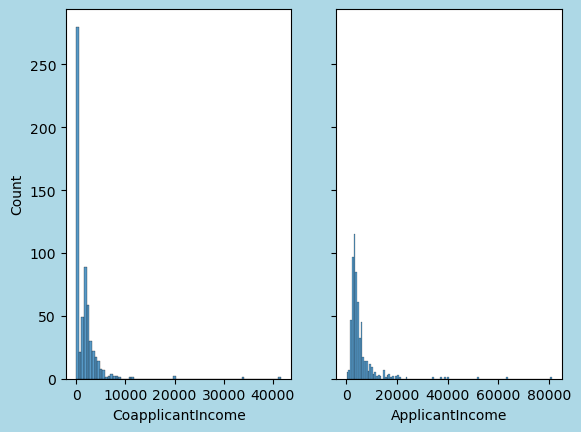

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(df.CoapplicantIncome, ax=ax1)
sns.histplot(df.ApplicantIncome, ax=ax2)
plt.show()

### Explore nominal (categorical) variables

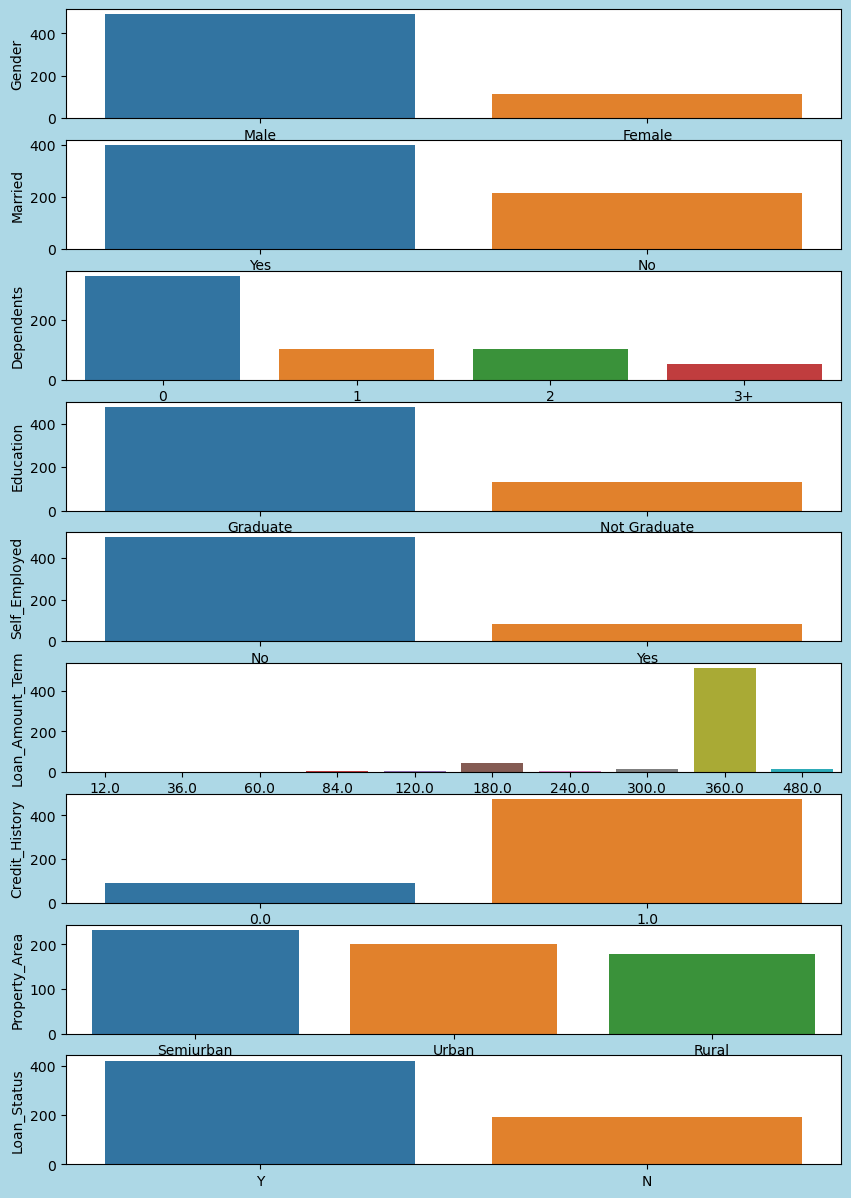

In [66]:
# call regplot on each axes
from matplotlib.pyplot import figure

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, figsize=(10,15))

sns.barplot(x=df.Gender.value_counts().index, y=df.Gender.value_counts(), ax=ax1)
sns.barplot(x=df.Married.value_counts().index, y=df.Married.value_counts(), ax=ax2)
sns.barplot(x=df.Dependents.value_counts().index, y=df.Dependents.value_counts(), ax=ax3)
sns.barplot(x=df.Education.value_counts().index, y=df.Education.value_counts(), ax=ax4)
sns.barplot(x=df.Self_Employed.value_counts().index, y=df.Self_Employed.value_counts(), ax=ax5)
sns.barplot(x=df.Loan_Amount_Term.value_counts().index, y=df.Loan_Amount_Term.value_counts(), ax=ax6)
sns.barplot(x=df.Credit_History.value_counts().index, y=df.Credit_History.value_counts(), ax=ax7)
sns.barplot(x=df.Property_Area.value_counts().index, y=df.Property_Area.value_counts(), ax=ax8)
sns.barplot(x=df.Loan_Status.value_counts().index, y=df.Loan_Status.value_counts(), ax=ax9)

plt.show()

Seems like a good bit of imbalance in most of the categorical features. 
<br>
Most notable is the Loan_Term with 360 month loan being the most popular

### Distribution analysis
Plot and review distribution of featues

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

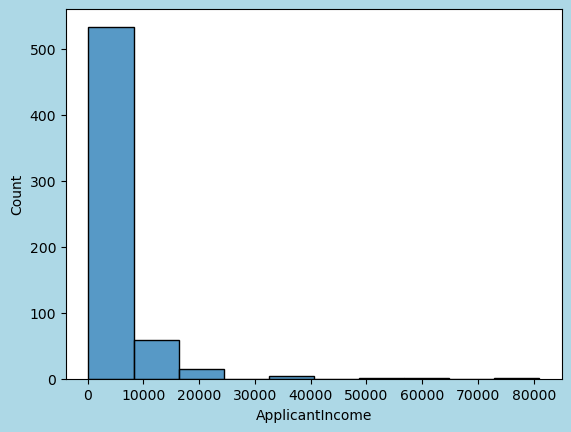

In [95]:
sns.histplot(df.ApplicantIncome,bins=10)

<AxesSubplot:xlabel='ApplicantIncome'>

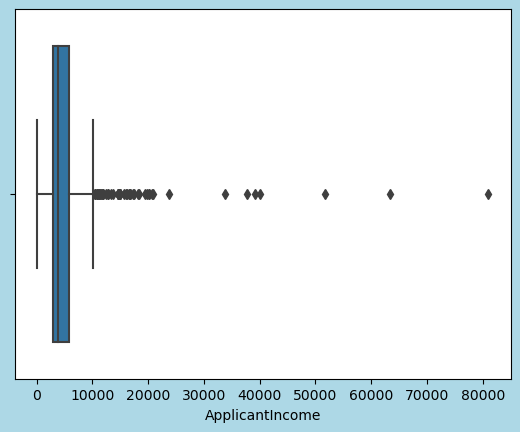

Looks like most of our applicants income fall within a tight range of data

-----------------------

Lets see if Education is an indicator of income

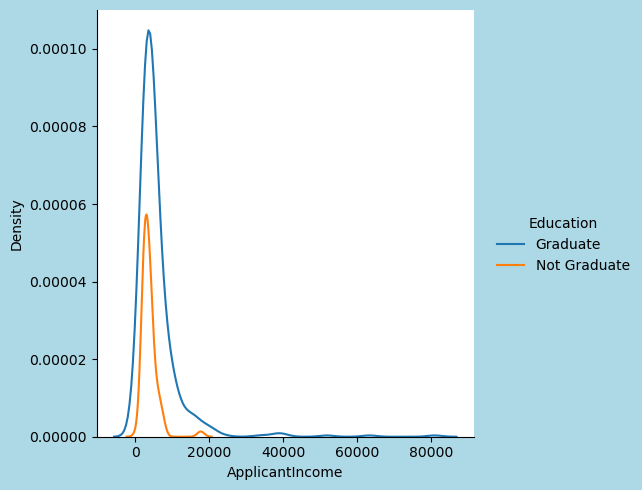

In [69]:
sns.displot(data=df, x='ApplicantIncome', hue='Education', kind="kde")

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

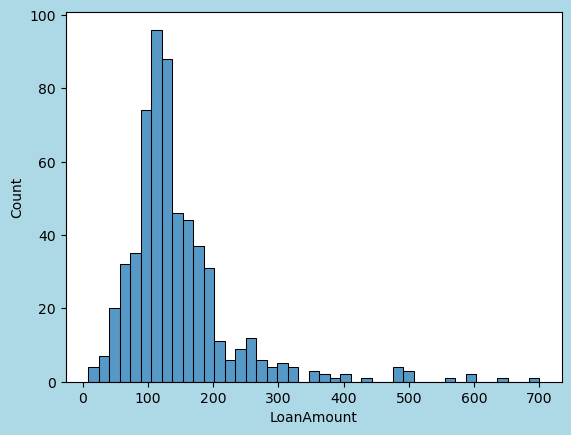

In [70]:
sns.histplot(df.LoanAmount)

<AxesSubplot:xlabel='LoanAmount'>

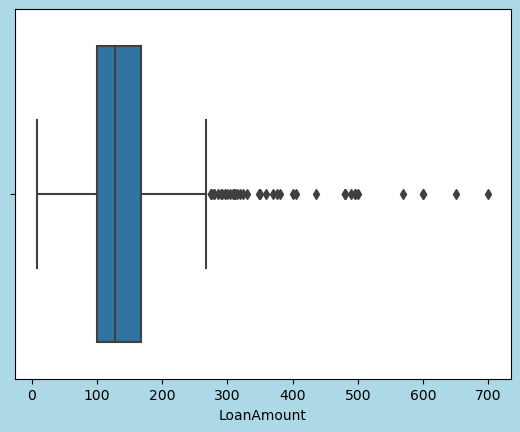

In [71]:
sns.boxplot(df.LoanAmount)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Stuff for the feature importance thing

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
mdf = df

In [41]:
mdf.Gender.fillna(value='Male', inplace=True)
mdf.dropna(subset='Married', inplace=True)
mdf.Dependents.fillna(value=0, inplace=True)
mdf.Self_Employed.fillna(value='No', inplace=True)
mdf.LoanAmount.fillna(value=df.LoanAmount.mean(), inplace=True)
mdf.dropna(subset='Loan_Amount_Term', inplace=True)
mdf.Credit_History.fillna(value=1.0, inplace=True)

In [42]:
mdf['Total_Income_Log'] = log_income
mdf['Loan_Amount_Log'] = log_loan

In [43]:
mdf.drop(['Loan_ID', 'Total_Income', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [45]:
gender_dummies = pd.get_dummies(mdf['Gender'], prefix='Sex', drop_first=True)
gender_dummies = pd.get_dummies(mdf['Married'], prefix='Married', drop_first=True)
dependent_dummies = pd.get_dummies(mdf['Dependents'], prefix='kids', drop_first=True)
gender_dummies = pd.get_dummies(mdf['Gender'], prefix='Sex', drop_first=True)
educate_dummies = pd.get_dummies(mdf['Education'], prefix='Education', drop_first=True)
self_employed_dummies = pd.get_dummies(mdf['Self_Employed'], prefix='Self_Employed', drop_first=True)
property_dummies = pd.get_dummies(mdf['Property_Area'], prefix='Property', drop_first=True)


mdf = pd.concat([mdf, self_employed_dummies,gender_dummies, gender_dummies, dependent_dummies, gender_dummies, educate_dummies, property_dummies], axis=1)

In [47]:
mdf.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis=1, inplace=True)

In [48]:
mdf.dropna(inplace=True)

In [49]:
y2= mdf['Loan_Status']
X2 = mdf.drop('Loan_Status', axis=1)

In [51]:
scaler = MinMaxScaler()
scaled_X = scaler.fit(X2)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20)
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

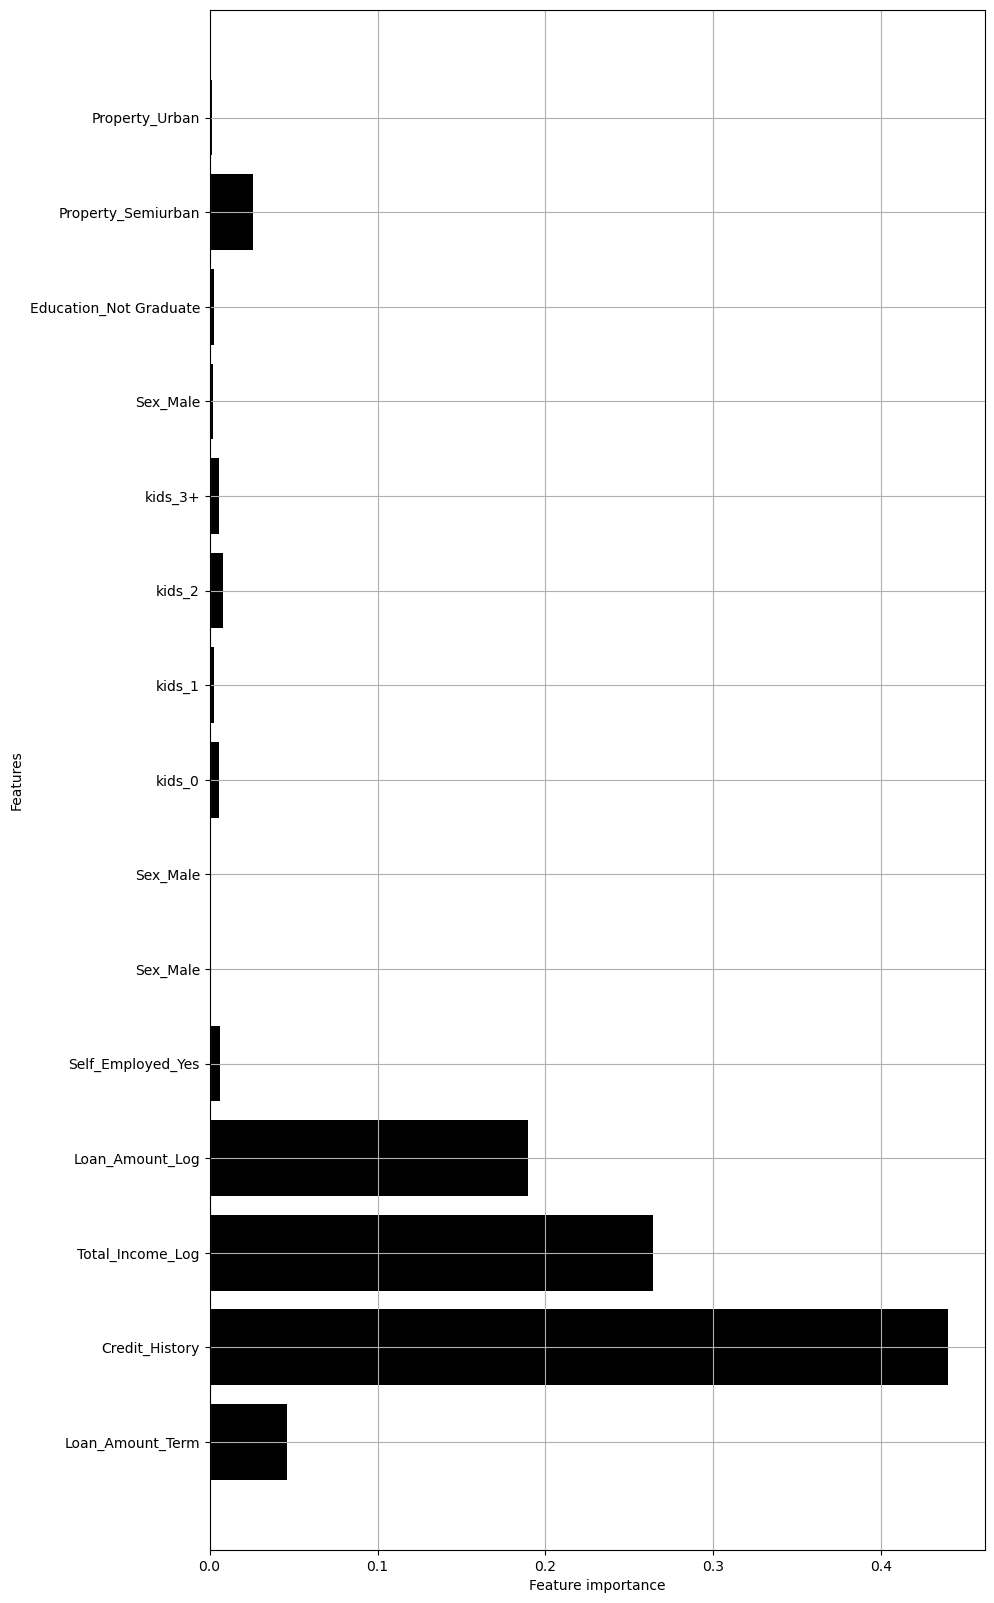

In [59]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 20))
    plt.barh(range(n_features), model.feature_importances_, color='k', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.grid(True)
plot_feature_importances(clf)

## Extreme values
Trying log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

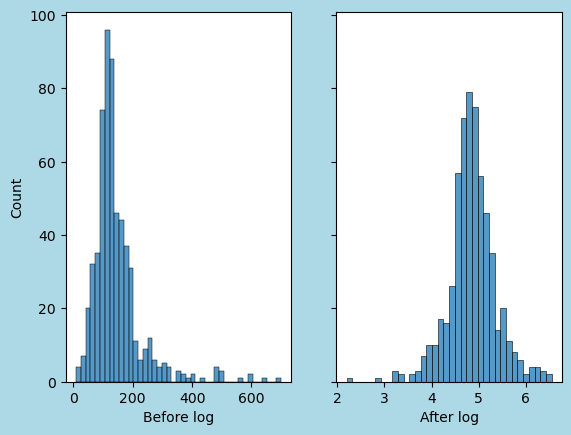

In [103]:
log_loan = np.log(df.LoanAmount)
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(df.LoanAmount, ax=ax1)
sns.histplot(log_loan, ax=ax2)
ax1.set_xlabel('Before log')
ax2.set_xlabel('After log')

plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [104]:
df['Total_Income'] = df.ApplicantIncome + df.CoapplicantIncome
log_income = np.log(df.Total_Income)

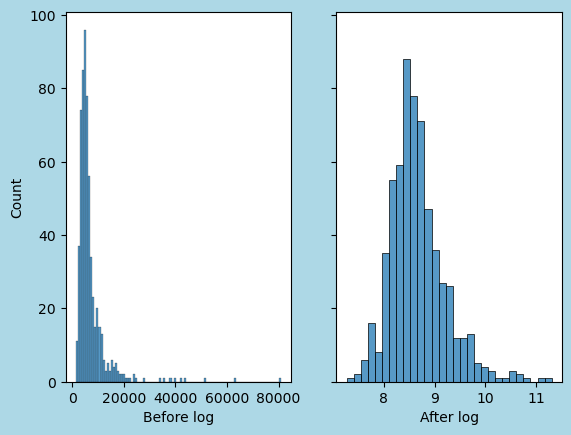

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(df.Total_Income, ax=ax1)
sns.histplot(log_income, ax=ax2)
ax1.set_xlabel('Before log')
ax2.set_xlabel('After log')
plt.show()

In [131]:
df['Total_Income_Log'] = log_income
df['Loan_Amount_Log'] = log_loan

## 3. Using Pipeline 
The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.


In [132]:
y = df.Loan_Status
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [134]:
num_feats = ['Total_Income_Log', 'Loan_Amount_Log', 'Loan_Amount_Term']
cat_feats = X.dtypes[df.dtypes == 'object'].index.tolist()

from sklearn.preprocessing import FunctionTransformer

# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

# we will start two separate pipelines for each type of features
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

In [135]:
# Use SimpleImputer
from sklearn.impute import SimpleImputer
# use OneHotencoder to create dummy variables
from sklearn.preprocessing import OneHotEncoder
# from sparse to dense
class ToDenseTransformer():
    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()
    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

In [136]:
# don't forget ToDenseTransformer after one hot encoder
from sklearn.decomposition import PCA
# use SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

In [149]:
category_transform = Pipeline( [('keep_cat', keep_cat),
                                ('impute_mode', SimpleImputer(strategy='most_frequent')),
                                ('onehotencode', OneHotEncoder()),
                               ])


numeric_transform = Pipeline([('keep_num', keep_num), 
                              ('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler()),
                            ])
preprocess_columns = ColumnTransformer([('numeric', numeric_transform, num_feats), ('categorical', category_transform, cat_feats)])


feature_union = FeatureUnion([('pca', PCA(n_components=3)),
                              ('select', SelectKBest(k=3))])

model = Pipeline(steps=[('preprocess', preprocess_columns),
                        ('features', feature_union),
                        ('classifier', GradientBoostingClassifier())
                       ])

In [150]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('keep_num',
                                                                   FunctionTransformer(func=<function numFeat at 0x000001DA373C6550>)),
                                                                  ('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Total_Income_Log',
                                                   'Loan_Amount_Log',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('keep_cat',
                                                                   FunctionTransformer...atFeat at 0x000001DA3729EDC0>)),
                                                                  ('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencode',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=3)),
                                                ('select', SelectKBest(k=3))])),
                ('classifier', GradientBoostingClassifier())])

In [151]:
model.score(X_test, y_test)

0.6260162601626016

Accuracy score: 0.6260162601626016


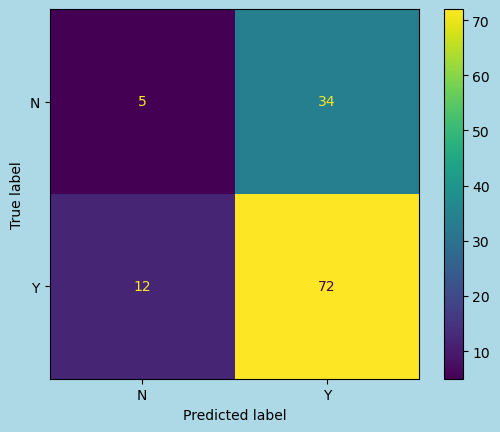

In [152]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')

## GridSearch Parameter Tuning

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
pipeline = Pipeline(steps=[('preprocess', preprocess_columns),
                        ('features', feature_union),
                        ('classifier', GradientBoostingClassifier())
                       ])

In [155]:
param_grid = {"classifier__loss":['log_loss'],
              "classifier__learning_rate": [0.1, 0.15, 0.2],
              "classifier__max_depth":[3,5,8],
              "classifier__max_features":["log2","sqrt"],
              'features__pca__n_components': [3, 5],
              'features__select__k': [1, 3, 6]
             }

In [156]:
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

In [157]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('keep_num',
                                                                                          FunctionTransformer(func=<function numFeat at 0x000001DA373C6550>)),
                                                                                         ('impute_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['Total_Income_Log',
                                                                          'Loan_Amount_Log',
                                                                          'Loan_Amount_Term']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('k...
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA(n_components=3)),
                                                                       ('select',
                                                                        SelectKBest(k=3))])),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.15, 0.2],
                         'classifier__loss': ['log_loss'],
                         'classifier__max_depth': [3, 5, 8],
                         'classifier__max_features': ['log2', 'sqrt'],
                         'features__pca__n_components': [3, 5],
                         'features__select__k': [1, 3, 6]})

In [158]:
best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.6341463414634146
Achieved with hyperparameters: {'classifier__learning_rate': 0.2, 'classifier__loss': 'log_loss', 'classifier__max_depth': 8, 'classifier__max_features': 'log2', 'features__pca__n_components': 5, 'features__select__k': 1}


In [160]:
pickle.dump( grid, open( "model2.p", "wb" ) )

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [9]:
import pandas as pd
import requests
import json

In [33]:
import requests
URL = "http://192.168.1.160:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = j_df) 

In [34]:
print(r.json())

['N']


## AWS ec2 instance call from tmux

In [5]:
import pandas as pd
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

In [19]:
j_df = pd.DataFrame(json_data, index=[0]).to_json()

In [29]:
json_data = {'Gender': 'Female',
             'Married': 'Yes',
             'Dependents': '0',
             'Education': 'Graduate',
             'Self_Employed': 'No',
             'ApplicantIncome': 2578,
             'CoapplicantIncome': 1010.0,
             'LoanAmount': 175,
             'Loan_Amount_Term': 12.0,
             'Credit_History': 1.0,
             'Property_Area': 'Semiurban',
             'Total_Income': 8588.0,
             'Total_Income_Log': 1.058121,
             'Loan_Amount_Log': 2.164786    
}
j_df = pd.DataFrame(json_data, index=[0]).to_json()

In [161]:
URL = 'http://ec2-52-91-99-3.compute-1.amazonaws.com:5000/scoring'


r = requests.post(url = URL, json = j_df)
print(r.json())

['N']
